### selfplot Documentation
selfplot is a package for visualizing numerical data with good defaults set for each plot.

selfplot has 2 objectives:
    1. To make standard data visualizations available with reasonable defaults(no need to explicitly set figuresize, colorbars, fontsize, etc).
    2. To make the charts visually appealing
    
During statistical analysis of data, a data scientist often needs to build various kinds of plots as he hopes to explore or confirm a hypothesis regarding the data. It can sometimes be a hurdle to write multiple lines of code before actually seeing a plot. In such cases, it is practical to have a minimum time delay between the conception of the hypothesis and the visualization of data.

The following package is an attempt to minimize the time taken to make visualizations. Reasonable defaults are set for each plots; however, they can be changed by the user if required.

In [21]:
# Load selfplot
import selfplot

# Load pandas
import pandas as pd

# Load Data
from sklearn.datasets import load_boston
from sklearn import linear_model

In [2]:
# Load Data to visualize
X = pd.DataFrame(load_boston().data, columns = load_boston().feature_names)
y = pd.Series(load_boston().target, name = 'median_housing_price')

# Concatenating X and y to form a single dataframe.
data = pd.concat([X, y], axis = 1)

##### selfplot Function names and brief description
The help function can be used to see the list and a brief description of all the functions available in selfplot. 

In [3]:
selfplot.help()

Functions available in selfplot:
    univariate() - Plot a histogram and a boxplot of data. Can be used to detect skew in data and the corresponding number of outliers through the boxplot.
    ts_univariate() - Plot a time series plot along with a violin plot to visualize the distribution.
    bivariate_binning() - Plot a variable y as a function of bins of variable x and plot the boxplot of y for every bin in x. This is similar to a scatterplot except that one of the variables is binned. The bins of x can be user defined.
    histogram() - Create histogram of data
    line() - Create Line plot or time series plot
    kde() - Plot the kernel density estimate
    box() - Plot the boxplot of a dataframe
    violin() - Plot a violin plot of a dataframe
    scatter() - Plot a scatter plot
    hexbin() - Plot a hexbin plot
    heatmap() - Plot a heatmap. This can be useful for visualizing correlations.
    bar() - Make an bar plot with annotation


The figure sizes, dpi and fontsize in each plot can be altered using the figsize, dpi, fontsize keywords respectively.

##### Bivariate Binning:
It helps us visualize the relation between 2 variables. It is similar to a scatterplot however, here, one of the variables is divided into several bins. The distribution of the second variable is visualized with respect to those bins. The bins can be set manually or left upto the function to set automatically.

D:\AnacondaInstalled\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


<module 'matplotlib.pyplot' from 'D:\\AnacondaInstalled\\lib\\site-packages\\matplotlib\\pyplot.py'>

<Figure size 1275x600 with 0 Axes>

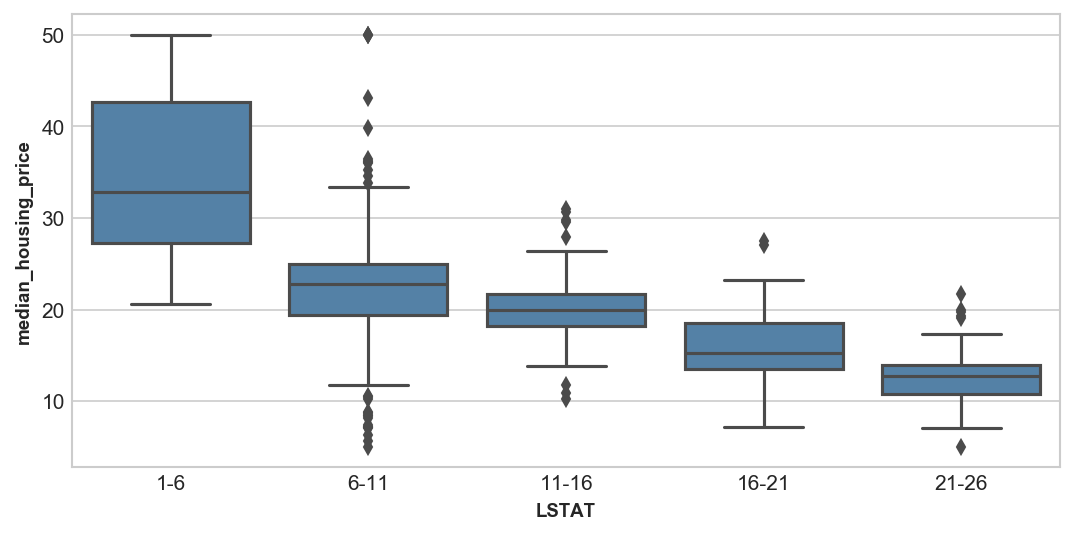

In [4]:
selfplot.bivariate_binning(data = data, x = 'LSTAT', y = 'median_housing_price', bins = range(1, 30, 5))

As can be seen in the plot, there is on average, a monotonic relation between the x-variable value and the y-variable value.
Also, if the bins represent actual operative regimes of the variable x, the outliers in each region of operation can also be seen from the plot.

#### Univariate plot
This plot is meant to visualize the spread, skew, and the presence of outliers in data. Often, we deal with non-normal data. In general, however, predictive models work well on normal data. 
The histogram can be used to visualize the spread and skew of data. The boxplot is drawn below it to see if the tails of a skewed data correspond to outliers in the boxplot. We can make transformations to the data and check the plot after performing data transformations to confirm whether it has taken the form of a normal distribution or not.

<module 'matplotlib.pyplot' from 'D:\\AnacondaInstalled\\lib\\site-packages\\matplotlib\\pyplot.py'>

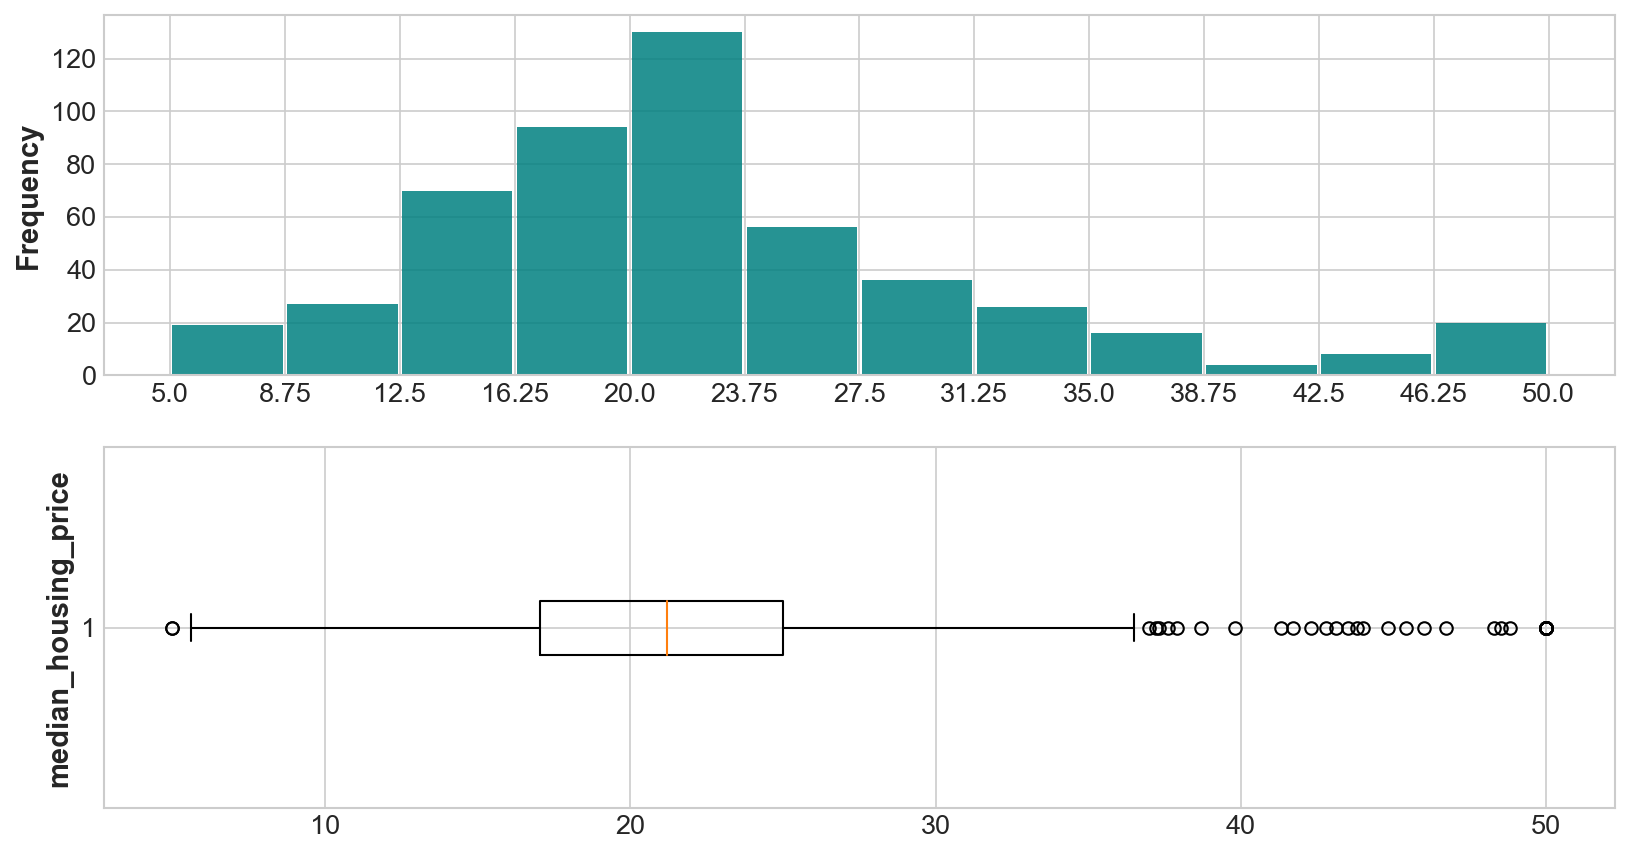

In [5]:
selfplot.univariate(y) ## The bins can be set using the bins keyword.

Here, we see that the data is right skewed. Many of those data points on the right tail are appearing as outliers. However, we can make suitable transformations to the data to make it more normal.

##### Heatmap
Heatmap is a way of visualizing a matrix of data. One of the most frequent uses of heatmaps, is in visualizing the correlations between variables.    

While plotting correlation heatmaps, it is important to set vmax = 1 and vmin = -1 in the function. vmax and vmin govern the range of data to which extreme values in the colormap are mapped. Since Correlation values are only between -1 and +1, it makes sense to set the colormap extremes to map to 1 and -1 for vmax and vmin respectively. 

<module 'matplotlib.pyplot' from 'D:\\AnacondaInstalled\\lib\\site-packages\\matplotlib\\pyplot.py'>

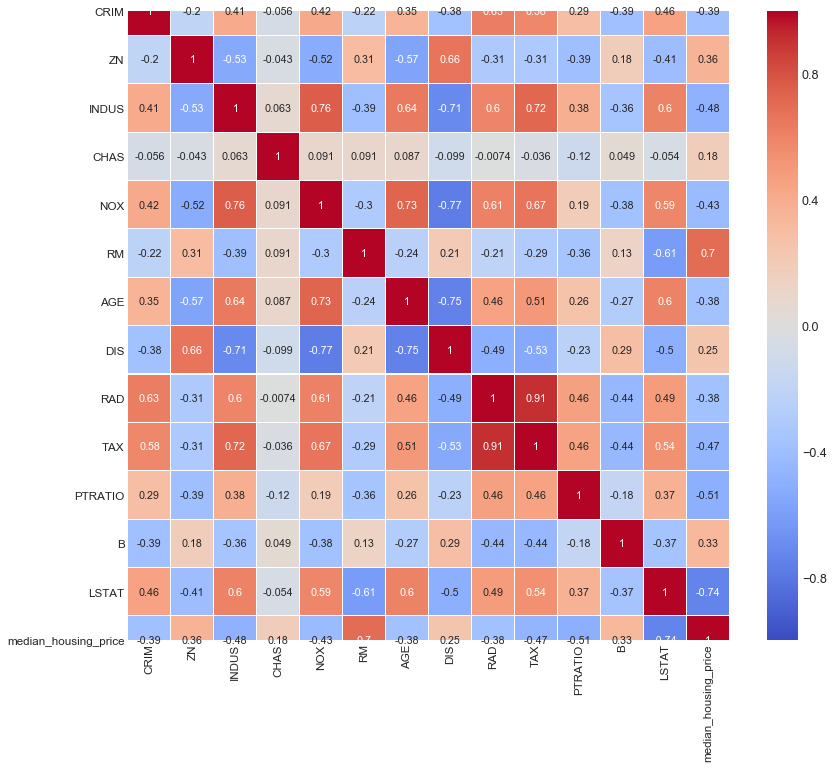

In [6]:
# Create the correlation matrix
correlation_matrix = data.corr()

# Visualize correlations using a heatmap
selfplot.heatmap(correlation_matrix, vmax = 1, vmin = -1, dpi = 70) #Set low dpi for preview;

##### Time series univariate descriptive plot
The following plot gives a lineplot and a violin plot to visualize a time-series plot.

<module 'matplotlib.pyplot' from 'D:\\AnacondaInstalled\\lib\\site-packages\\matplotlib\\pyplot.py'>

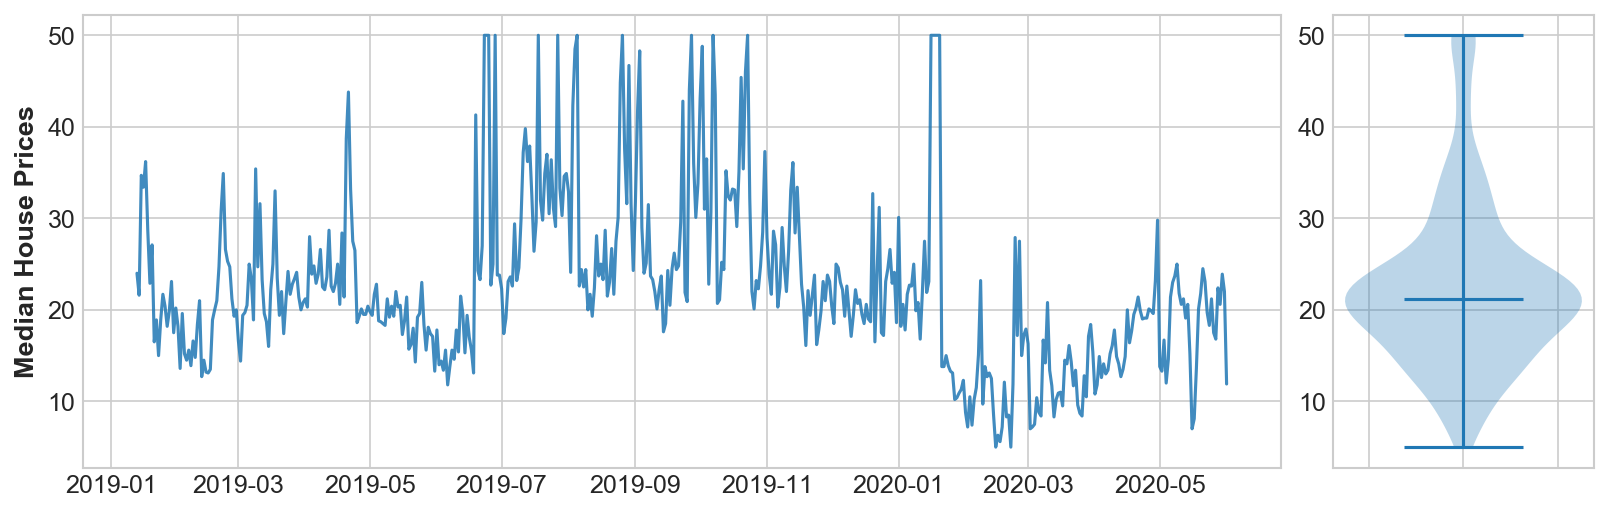

In [7]:
# Convert median_housing_prices to time series data
date_index = pd.date_range(start='13/01/2019', periods = data.shape[0])
ts_median_housing_prices = pd.Series(data = y.values, index = date_index, name = 'Median House Prices')

# Plot a time series chart
selfplot.ts_univariate(ts_median_housing_prices)

#### General Purpose Descriptive Univariate plots
Folowing are the standard univariate plots. In each plot, the figuresize, dpi and fontsize have a default value but can be changed. Also, the title, xlabel and ylabels can also be changed by using appropriate matplotlib commands.

##### Histogram

<module 'matplotlib.pyplot' from 'D:\\AnacondaInstalled\\lib\\site-packages\\matplotlib\\pyplot.py'>

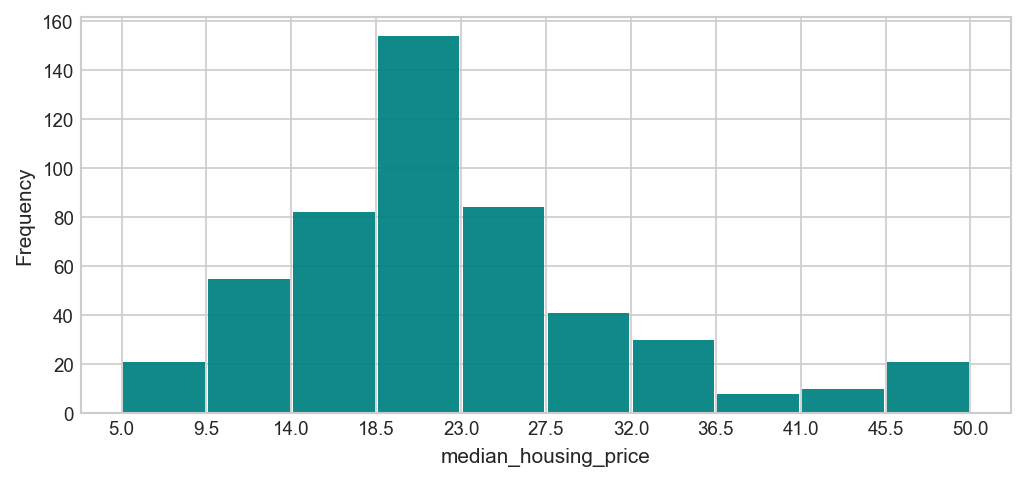

In [8]:
selfplot.histogram(y, bins = 10) # the bins keyword can be used to specify the number of bins or bin edges. 
#If not specified, 14 bins are used by default.

##### KDE Plot

<module 'matplotlib.pyplot' from 'D:\\AnacondaInstalled\\lib\\site-packages\\matplotlib\\pyplot.py'>

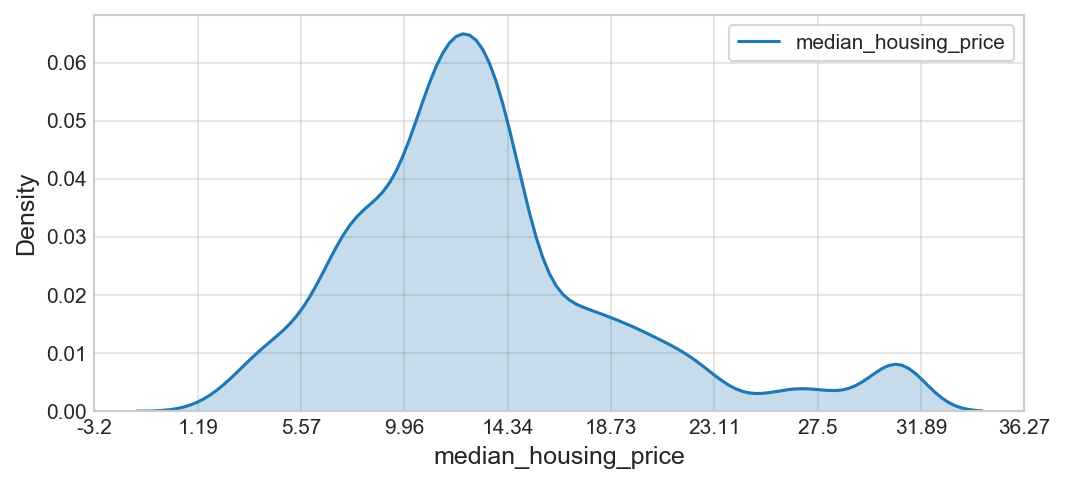

In [9]:
selfplot.kde(y)

##### Boxplot
Boxplot of a dataframe can be made by just passing the dataframe to the function

<module 'matplotlib.pyplot' from 'D:\\AnacondaInstalled\\lib\\site-packages\\matplotlib\\pyplot.py'>

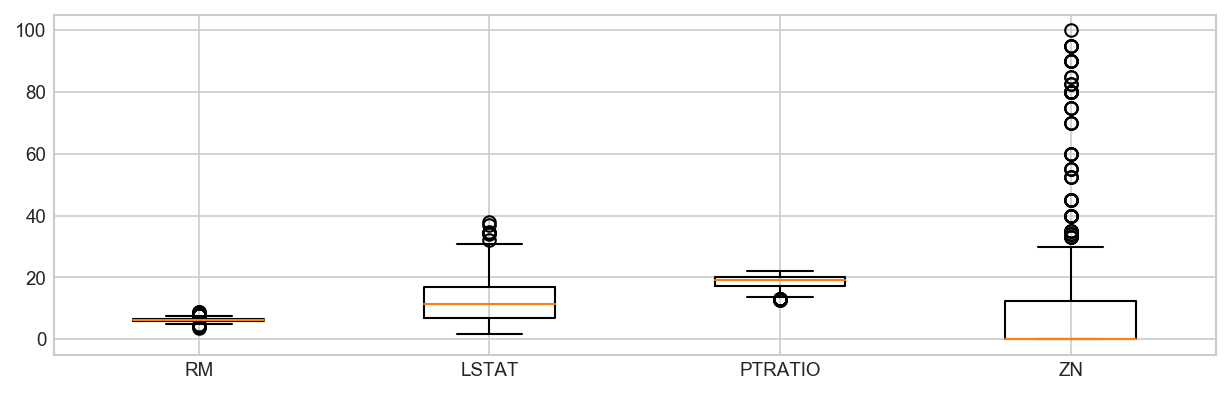

In [10]:
selfplot.box(data, colnames = ['RM', 'LSTAT', 'PTRATIO', 'ZN'], figsize = (10, 3)) # Setting the figuresize manually

##### Violinplot
Standard violin plot for a dataframe.

<module 'matplotlib.pyplot' from 'D:\\AnacondaInstalled\\lib\\site-packages\\matplotlib\\pyplot.py'>

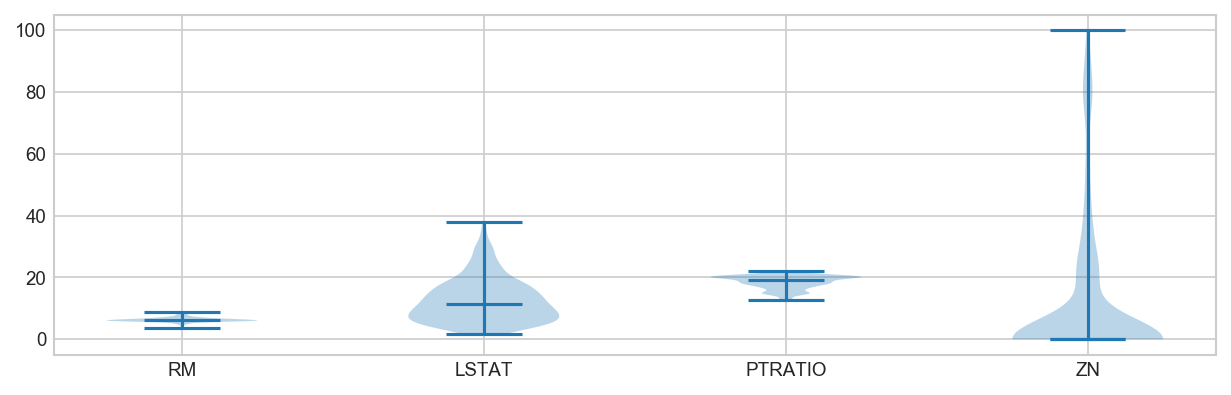

In [11]:
selfplot.violin(data, colnames = ['RM', 'LSTAT', 'PTRATIO', 'ZN'], figsize = (10, 3)) # Setting the figuresize manually

##### ScatterPlot
Scatterplot with color and size variables that can be set to reflect the values of some other variable. 

<module 'matplotlib.pyplot' from 'D:\\AnacondaInstalled\\lib\\site-packages\\matplotlib\\pyplot.py'>

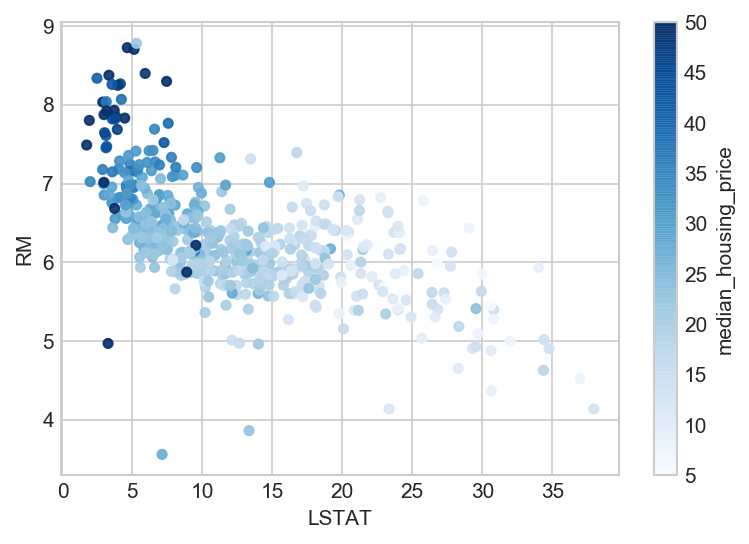

In [12]:
selfplot.scatter(data['LSTAT'], data['RM'], c = data['median_housing_price'])

##### Hexbin Plot
When data contains many points, scatterplots can become cluttered. Too many points overlap and we are not able to see the density of points in any given region.
Hexbin plots can be used as substitutes to scatter plots when the number of data points becomes very large. 

<module 'matplotlib.pyplot' from 'D:\\AnacondaInstalled\\lib\\site-packages\\matplotlib\\pyplot.py'>

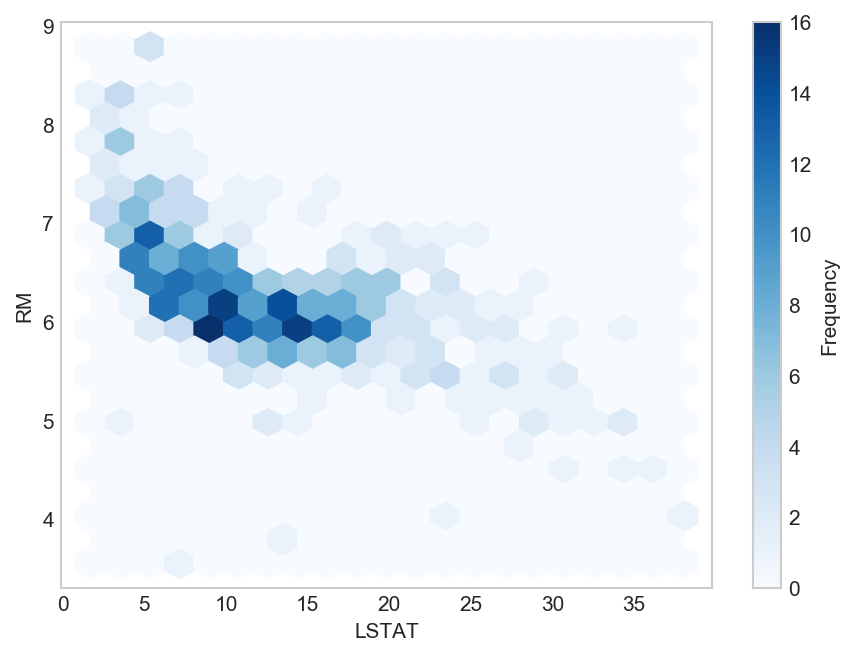

In [13]:
selfplot.hexbin(data['LSTAT'], data['RM']) # A similar relation to the scatterplot

##### Line plot for time series data


<module 'matplotlib.pyplot' from 'D:\\AnacondaInstalled\\lib\\site-packages\\matplotlib\\pyplot.py'>

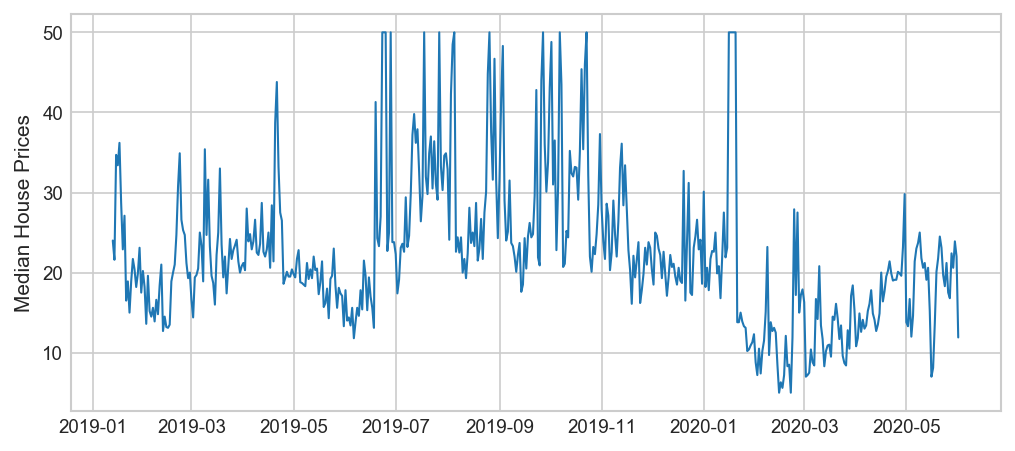

In [14]:
selfplot.line(ts_median_housing_prices)

##### Example of how to customize the plots
Such customizations can be made to every plot. 

In [15]:
import matplotlib.pyplot as plt

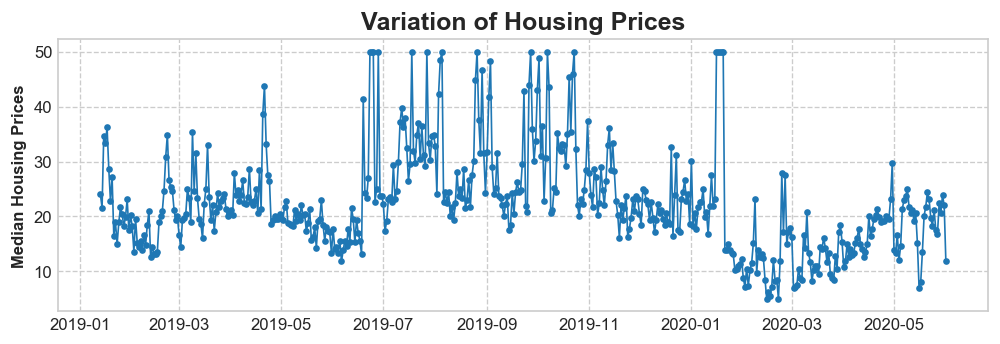

In [16]:
# Make the basic line plot
selfplot.line(ts_median_housing_prices, figsize = (10, 3), marker = 'o', dpi = 120)

# Set ylabel and title
plt.ylabel('Median Housing Prices', weight = 'bold')
plt.title('Variation of Housing Prices', fontsize = 15, weight = 'bold')

# Change fontsize of xticks and yticks
plt.setp(plt.gca().get_yticklabels()+plt.gca().get_xticklabels(), fontsize = 10)

# Change grid style to dashed
plt.grid(linestyle = '--')

This package was made to ease the process of Exploratory and Confirmatory data analysis; the intention being that we should focus more on our Analysis objective than the programming tools required to do that. 

#### Barplot with annotation


To explore barplots let us consider a case when we want to bin the LSTAT variable and want to visualize the average housing prices in the bins.
Let us first bin LSTAT

In [17]:
# Bin LSTAT into predefined bins
data['LSTAT Binned'] = pd.cut(data['LSTAT'], bins = [1, 5, 10, 15, 20, 25, 30, 38], labels = ['1-5', '5-10', '10-15', '15-25',
                                                                                          '20-25', '25-30', '30-38'])

# Average Price in each bin
avg_price = data.groupby('LSTAT Binned')['median_housing_price'].mean()**.4
avg_price = pd.DataFrame(avg_price).reset_index()
avg_price

,LSTAT Binned,median_housing_price
0,1-5,4.275086
1,5-10,3.691997
2,10-15,3.355542
3,15-25,3.069484
4,20-25,2.777987
5,25-30,2.738796
6,30-38,2.579991


<module 'matplotlib.pyplot' from 'D:\\AnacondaInstalled\\lib\\site-packages\\matplotlib\\pyplot.py'>

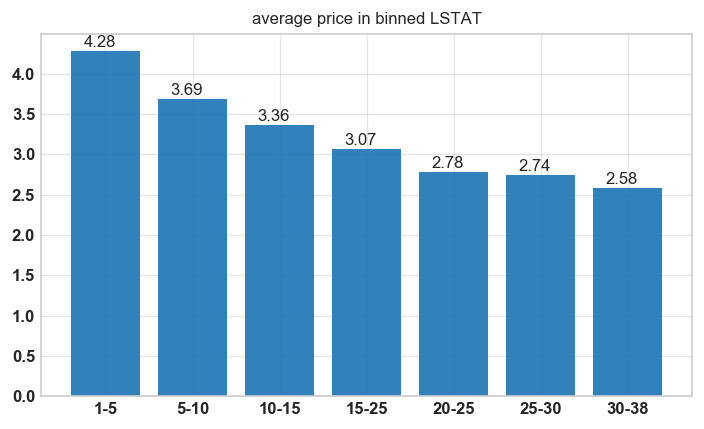

In [18]:
# Let us round off the housing price to 2 decimal places
avg_price['median_housing_price'] = avg_price['median_housing_price'].round(2)

# Make the barplot
selfplot.bar(avg_price['LSTAT Binned'], y = avg_price['median_housing_price'], title = 'average price in binned LSTAT')

### Model Diagnostics

In [19]:
# Load Data to visualize
X = pd.DataFrame(load_boston().data, columns = load_boston().feature_names)[['LSTAT', 'RM']]
y = pd.Series(load_boston().target, name = 'median_housing_price')

# Concatenating X and y to form a single dataframe.
data = pd.concat([X, y], axis = 1)

In [22]:
model = linear_model.LinearRegression().fit(X, y)

In [23]:
y_true = y
y_pred = model.predict(X)

<module 'matplotlib.pyplot' from 'D:\\AnacondaInstalled\\lib\\site-packages\\matplotlib\\pyplot.py'>

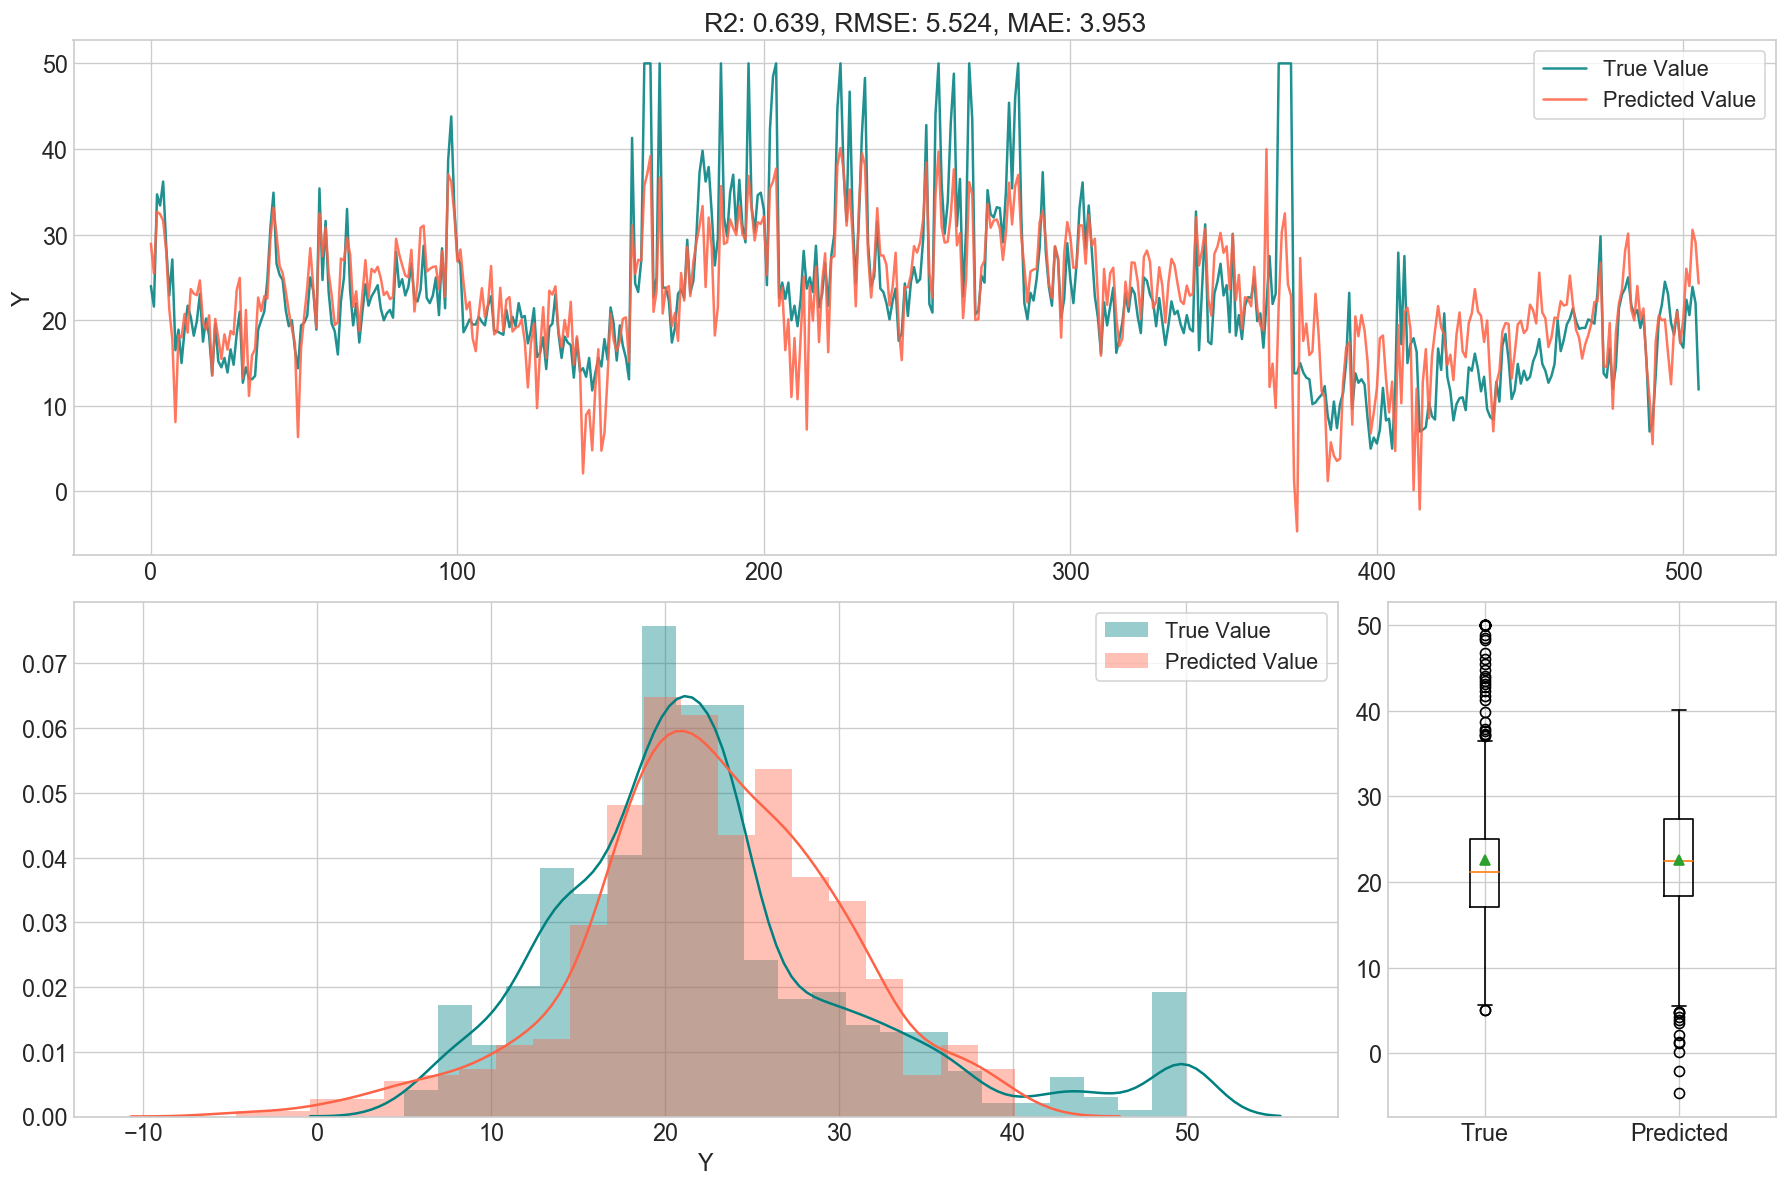

In [27]:
selfplot.prediction_diagnose(y_true = y_true, y_pred = y_pred)

No handles with labels found to put in legend.


<module 'matplotlib.pyplot' from 'D:\\AnacondaInstalled\\lib\\site-packages\\matplotlib\\pyplot.py'>

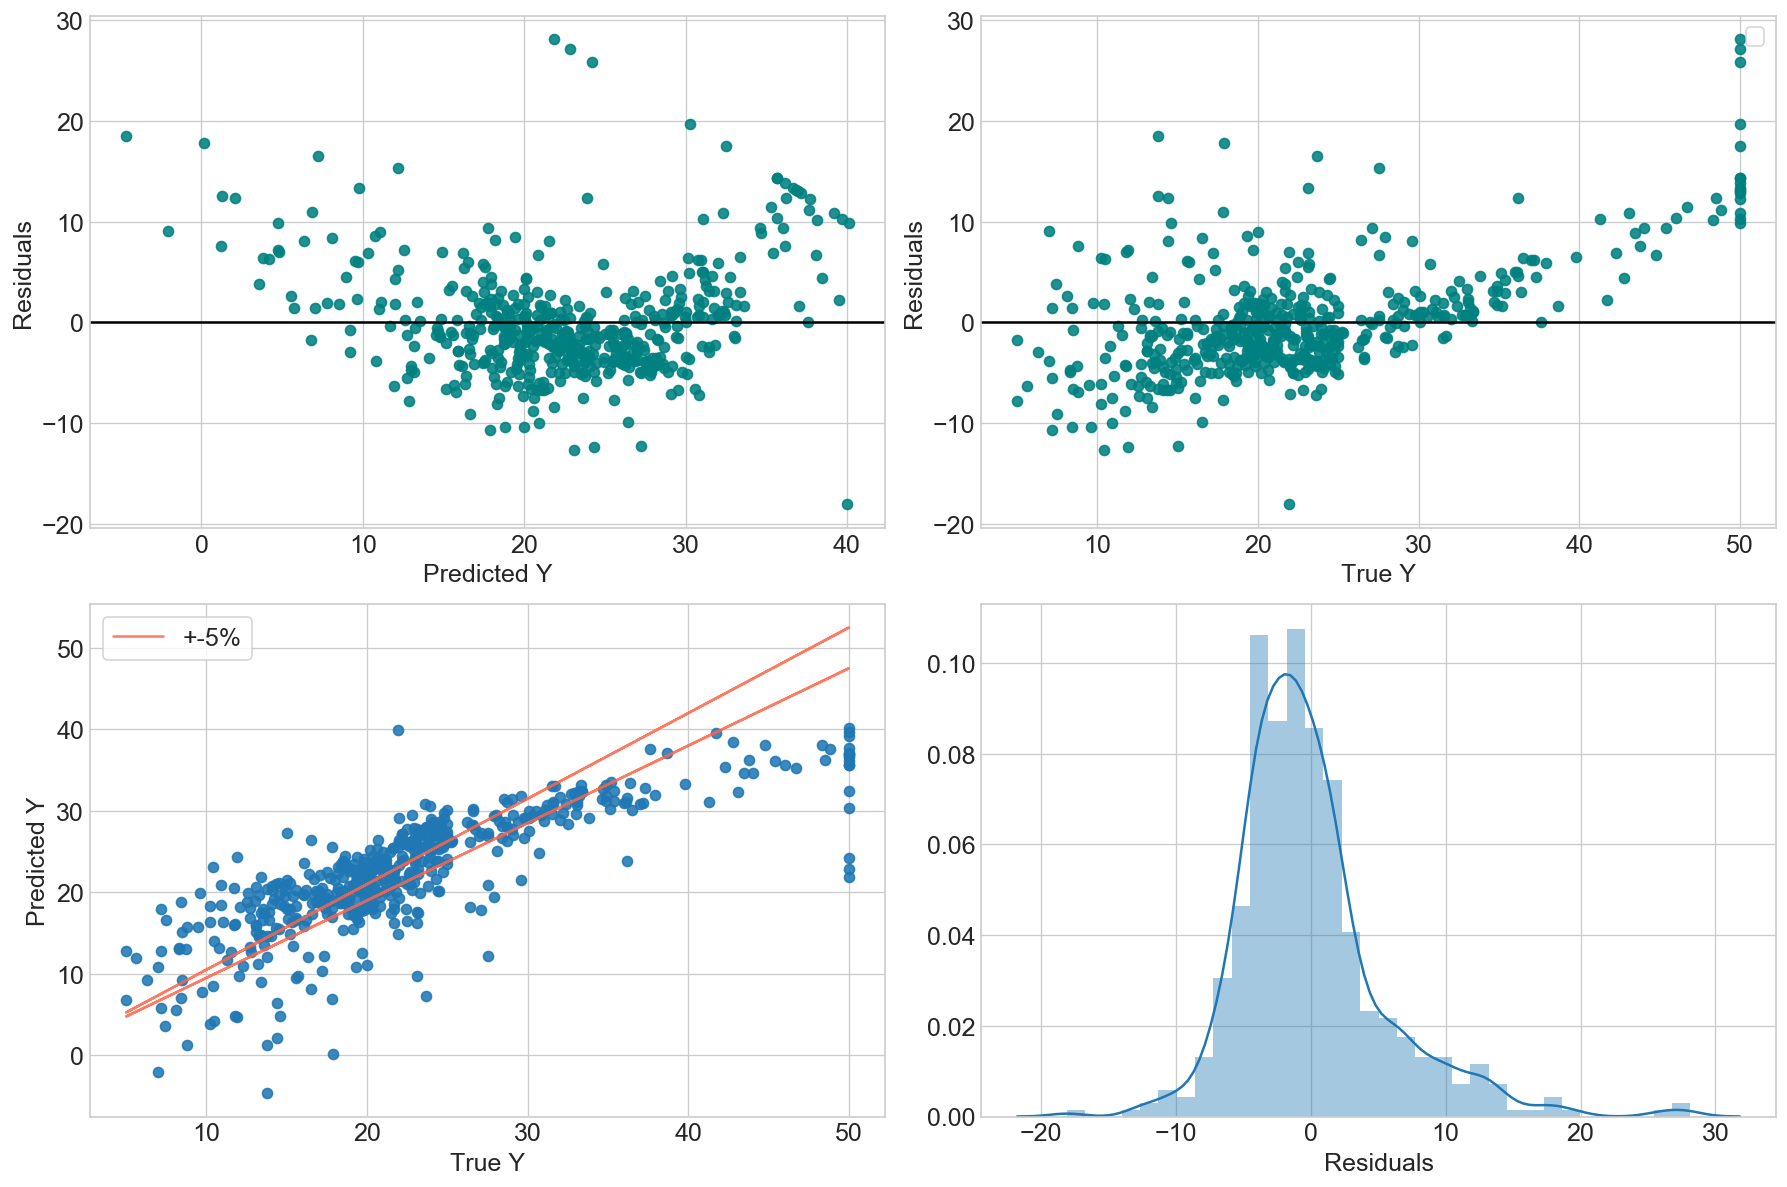

In [26]:
selfplot.residual_diagnose(y_true = y_true, y_pred = y_pred)